In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import scipy.stats
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import os
from datetime import datetime

,mean.modelado,mean.obs,len.obs,len.mod,rmse,nrmse.mean,bias,nbias.mean,r,R.2.aj,sd_mod,sd_obs,crmsd,intercep,slope,name,ciudad
0,0.08735,0.12587,514,514,0.05575,0.44295,-0.03852,-0.30604,0.48683,0.237003,0.041217,0.038275,0.3202,0.021362,0.524250,maiac6-02,1_SP-25KM-60-M6M61-AER-MOD
1,0.17102,0.27312,154,154,0.11648,0.42647,-0.10210,-0.37382,0.56249,0.316395,0.063503,0.055889,0.2053,-0.003534,0.639116,maiac6-04,1_SP-25KM-60-M6M61-AER-MOD
2,0.31804,0.51698,18,18,0.21333,0.41265,-0.19894,-0.38481,0.81818,0.669419,0.116795,0.137662,0.1490,-0.040823,0.694155,maiac6-06,1_SP-25KM-60-M6M61-AER-MOD
3,0.10399,0.12587,514,514,0.04944,0.39278,-0.02188,-0.17384,0.48388,0.234140,0.047629,0.038275,0.3522,0.028198,0.602133,maiac61-02,1_SP-25KM-60-M6M61-AER-MOD
4,0.19262,0.27312,154,154,0.09653,0.35342,-0.08051,-0.29476,0.59675,0.356111,0.062400,0.055889,0.1950,0.010644,0.666270,maiac61-04,1_SP-25KM-60-M6M61-AER-MOD
5,0.34279,0.51698,18,18,0.19091,0.36929,-0.17419,-0.33693,0.81359,0.661929,0.119707,0.137662,0.1512,-0.022960,0.707478,maiac61-06,1_SP-25KM-60-M6M61-AER-MOD
6,0.13211,0.12587,514,514,0.06097,0.48439,0.00624,0.04955,0.47733,0.227844,0.068812,0.038275,0.4818,0.024092,0.858151,modis02,1_SP-25KM-60-M6M61-AER-MOD
7,0.25289,0.27312,154,154,0.08472,0.31020,-0.02024,-0.07409,0.54163,0.293363,0.098135,0.055889,0.3012,-0.006863,0.951036,modis04,1_SP-25KM-60-M6M61-AER-MOD
8,0.50580,0.51698,18,18,0.07583,0.14668,-0.01118,-0.02163,0.90540,0.819749,0.175037,0.137662,0.1451,-0.089352,1.151208,modis06,1_SP-25KM-60-M6M61-AER-MOD


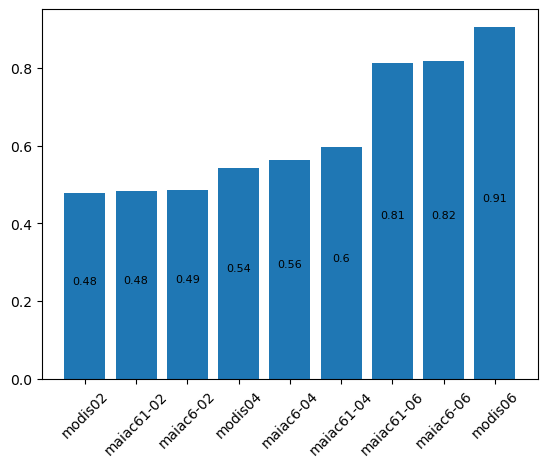

In [3]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1]/2,y_list[i-1], ha="center")
# Hacemos un solo plot para probar metodologia
data_SP = pd.read_csv("D:/Josefina/paper_git/paper_maiac/plot/estadisticas/ciudades/1_SP_estadisticas_M6M61-MOD-AER-carga.csv" )

data_SP_sorted = data_SP.sort_values(by = ['r'])
data_SP_sorted['n'] = [0,1,2,3,4,5,6,7,8]
data_SP_sorted.set_index('n', inplace = True)

# print(data_SP.columns)

fig, ax = plt.subplots()
ax.bar(height = data_SP_sorted['r'],  x=data_SP_sorted['name'])
ax.tick_params(axis='x', labelrotation = 45)

ax.text(0, (data_SP_sorted['r'][0]/2), round(data_SP_sorted['r'][0],2) , fontsize=8, ha="center", va="bottom")
ax.text(1, (data_SP_sorted['r'][1]/2), round(data_SP_sorted['r'][1],2) , fontsize=8, ha="center", va="bottom")
ax.text(2, (data_SP_sorted['r'][2]/2), round(data_SP_sorted['r'][2],2) , fontsize=8, ha="center", va="bottom")
ax.text(3, (data_SP_sorted['r'][3]/2), round(data_SP_sorted['r'][3],2) , fontsize=8, ha="center", va="bottom")
ax.text(4, (data_SP_sorted['r'][4]/2), round(data_SP_sorted['r'][4],2) , fontsize=8, ha="center", va="bottom")
ax.text(5, (data_SP_sorted['r'][5]/2), round(data_SP_sorted['r'][5],2) , fontsize=8, ha="center", va="bottom")
ax.text(6, (data_SP_sorted['r'][6]/2), round(data_SP_sorted['r'][6],2) , fontsize=8, ha="center", va="bottom")
ax.text(7, (data_SP_sorted['r'][7]/2), round(data_SP_sorted['r'][7],2) , fontsize=8, ha="center", va="bottom")
ax.text(8, (data_SP_sorted['r'][8]/2), round(data_SP_sorted['r'][8],2) , fontsize=8, ha="center", va="bottom")


data_SP 
# plt.show() #dibujamos el histograma41

In [2]:
# linear regression
def bar_plot (path, nrows,ncols,color_modis,color_maiac, plot, metrica):

    i=0 
    j=0 
    edge_color_maiac = color_maiac #["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
    edge_color_modis = color_modis#["#41ab5d","#feb24c","#cb181d","#045a8d","#ce1256","#810f7c"]
    

    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        print(p)
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        
        #data_sorted = data.sort_values(by = ['r'])
        data_sorted = data
        data_sorted['n'] = [0,1,2,3,4,5,6,7,8]
        data_sorted.set_index('n', inplace = True)
        # Station Name
        station_name = files [2:4]
                
        #print(files)
        ########################                PLOT                ########################
        # Figure
        #Scatter plot Unit vs Ref
        ax[i][j].bar(height = data_sorted[metrica],  x=data_sorted['name'],color=color_maiac[p], alpha=0.7)

        ax[i][j].tick_params(axis='x', labelrotation = 90,length=0)

# #         # para la metrica r
#         ax[i][j].set_ylim(0, 1)
#         ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.2, 0.2))
        
            # para la metrica rmse
        ax[i][j].set_ylim(0, 0.3)
        ax[i][j].yaxis.set_ticks(np.arange(0, 0.33, 0.1))
        
#             # para la metrica BIAS
#         ax[i][j].set_ylim(-0.3, 0.1)
#         ax[i][j].yaxis.set_ticks(np.arange(-0.3, 0.12, 0.1))

#             # para la metrica r2
#         ax[i][j].set_ylim(0, 0.8)
#         ax[i][j].yaxis.set_ticks(np.arange(0, 0.83, 0.2))
        #text
        ax[i][j].text(0, (data_sorted[metrica][0]/2), round(data_sorted[metrica][0],2) , fontsize=8, ha="center", va="bottom")
        ax[i][j].text(1, (data_sorted[metrica][1]/2), round(data_sorted[metrica][1],2) , fontsize=8, ha="center", va="bottom")
        ax[i][j].text(2, (data_sorted[metrica][2]/2), round(data_sorted[metrica][2],2) , fontsize=8, ha="center", va="bottom")
        ax[i][j].text(3, (data_sorted[metrica][3]/2), round(data_sorted[metrica][3],2) , fontsize=8, ha="center", va="bottom")
        ax[i][j].text(4, (data_sorted[metrica][4]/2), round(data_sorted[metrica][4],2) , fontsize=8, ha="center", va="bottom")
        ax[i][j].text(5, (data_sorted[metrica][5]/2), round(data_sorted[metrica][5],2) , fontsize=8, ha="center", va="bottom")
        ax[i][j].text(6, (data_sorted[metrica][6]/2), round(data_sorted[metrica][6],2) , fontsize=8, ha="center", va="bottom")
        ax[i][j].text(7, (data_sorted[metrica][7]/2), round(data_sorted[metrica][7],2) , fontsize=8, ha="center", va="bottom")
        ax[i][j].text(8, (data_sorted[metrica][8]/2), round(data_sorted[metrica][8],2) , fontsize=8, ha="center", va="bottom")


  
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 16})
        # Axes names
#         ax[i][j].set_xlabel(r'$AOD_{AERONET}$',size=10)
        ax[i][j].set_ylabel(metrica,size=10)
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
        
        # Location of data in each subplot
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("linear_regression_plot.jpg", dpi=500))
    else:
        return(plt.show())

0
1
2
3
4
5


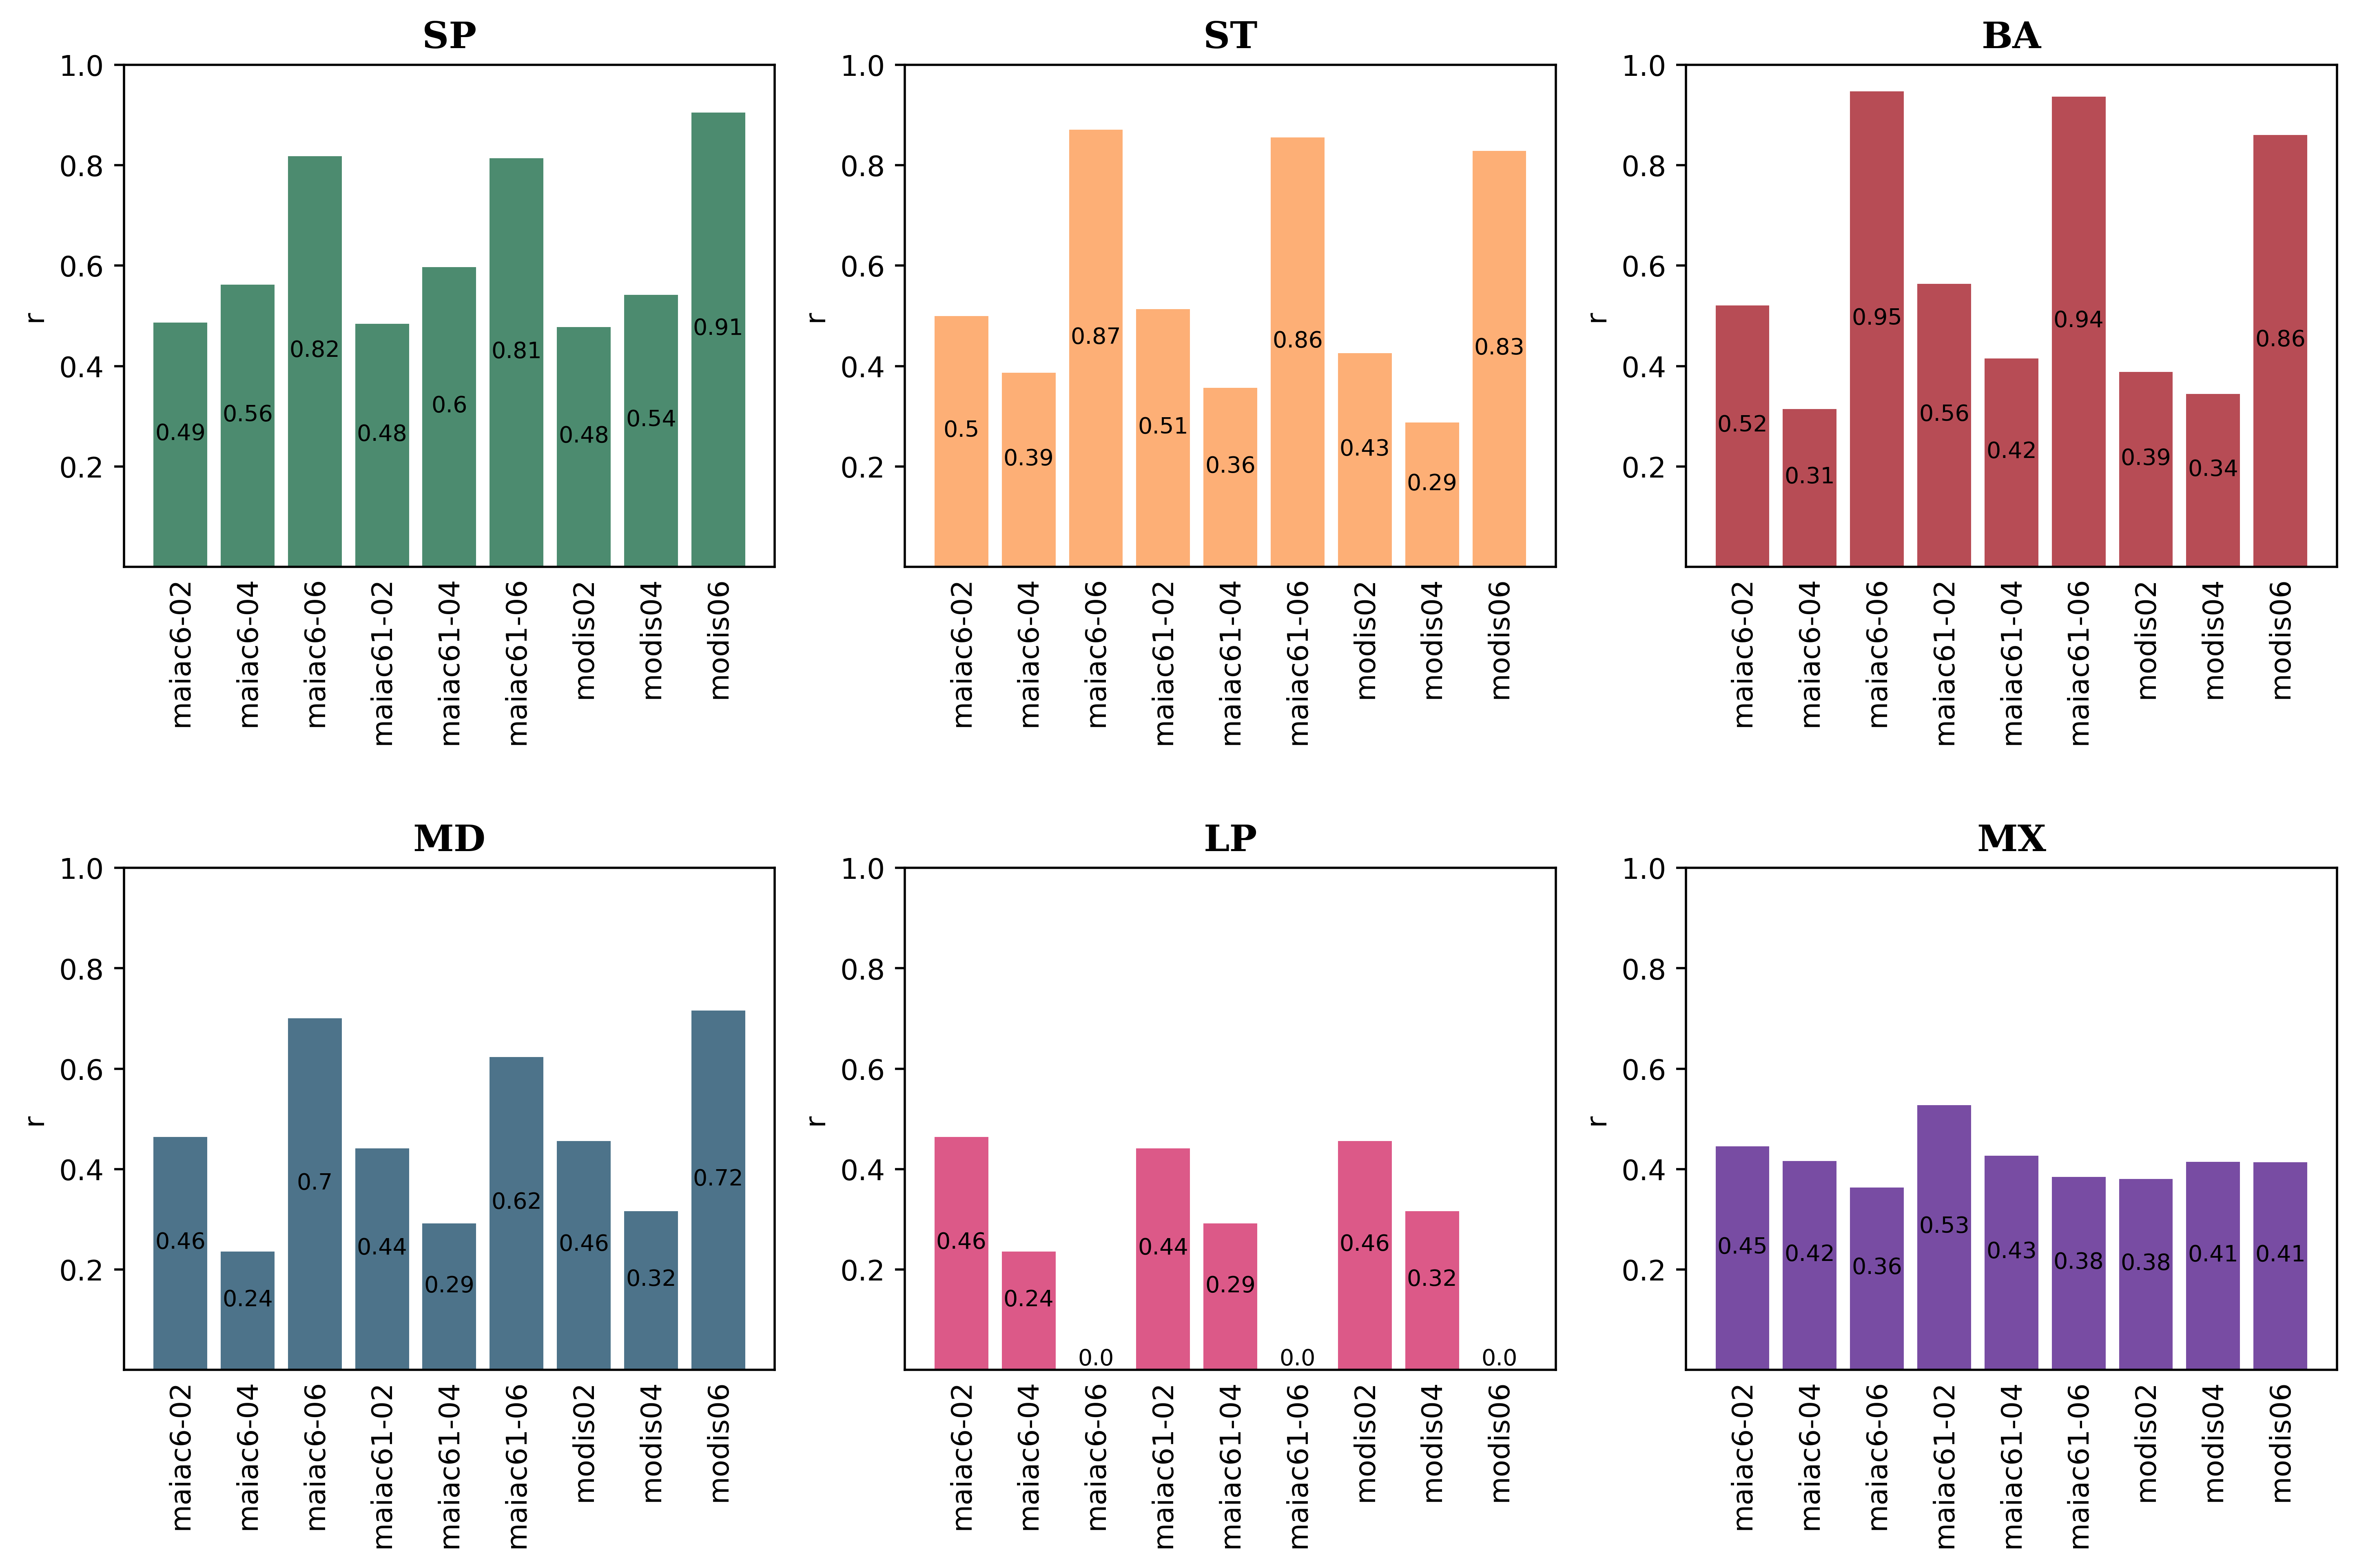

In [6]:
# R

color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"] # CHILE "#fd8d3c"

bar_plot (metrica = "r",path="D:/Josefina/paper_git/paper_maiac/plot/estadisticas/ciudades/",nrows=2,ncols=3,color_modis = color_modis,color_maiac =color_maiac ,plot='LALAL')


01. SP: En los 3 productos vemos que a medida que aumenta los niveles de carga de aerosoles aumenta la correlacion. La correlacion para niveles altos es alta. mientras que para niveles bajos-moderados es moderada
        Entre niveles bajos y moderados la diferencia es menor en comparacion con los niveles altos de aerosoles
       La mayor diferencia entre las categorias se observa para MODIS.
       Los mejores resultados para niveles altos se observa para MODIS, pero para niveles moderados es mejor MAIAC6.1, y para los mas bajos existe una sutil diferencia pero es mejor MAIAC6.0.
       
Si comparamos los productos MAIAC, no vemos mejoras siginificativas para niveles bajos y altos donde en ambos casos es mejor C6.0; pero si se observan diferencias para los niveles de carga moderados donde se muestra la mejoria en la correlacion de la C6.1.
       
02. ST para ST se observan diferencias altas entre las categorias, donde al igual que para SP las mejores correlaciones se dan para niveles altos de aerosoles (R = alto). Incuso mejores resultados que SP.
    Mientras que para las otras categorias el r es bajo-moderado.
    A diferencia de SP, las correlaciones mas bajas se dan para los niveles moderados de aod.
    Para todos los casos vemos que MAIAC 6.0 presenta los mejores resultados, por lo que no se observan mejoras con la nueva version de MAIAC C6.1. Savgo (pero muy poca la diferencia) para AOD moderados
    Las mayores diferencias entre los productos se dan a niveles mas bajos
       
03. BA Al igual que SP y ST los mejores resultados se observan a niveles de aos mas altos
      Al igual que ST los niveles de carga moderados son los uqe presentan los resultados mas bajos
      En todos los casos la correlacion es moderada-alta
      Para AOD mas altos, los mejores resultados se muestran para MAIAC 6.0 mientras que MODIS el resultado mas bajo. La diferencia entre C6.0 y 6.1 es muy sutil, por lo que no hay mejoras con respecto a esto.
      Para AOD bajos y moderados, se muestra una mejora entre C6.0 y 6.1, donde la C6.1 muestra los peores resultados.
      La diferencia entre aod bajo y medio en comparacion con aod alto es significativo.
   
04. MD  Al igual que SP, ST, BA los mejores resultados se observan a niveles de aos mas altos, con correlaciones altas
      Al igual que ST y BA los niveles de carga moderados son los uqe presentan los resultados mas bajos. Con correlaciones bajas. 
      El mejor producto para este sitio es MODIS, seguido por MAIAC6.0.
      Si comparamos las C6.0 y C6.1 vemos que para AOD bajos y altos se obtuvieron mejores resultados C6.0 mientras que para AOD moderados hay una leve mejora de 6.1
      
      
05. LP LP es una zona con niveles de aod principalmente bajo, por lo que no hay recuperaciones con niveles mayores a 0.4.
    A diferencia de los sitios anteiores vemos que a niveles mas bajos se obtuvieron los mejores resultados
    MAIAC6.0 y MODIS se obtuvieron los mejores resultados para los niveles bajos de AOD. Mientras que a niveles moderados fue para MODIS. Es decirque no hay mejoras significativas si comparamos las C6.1 y C6.0
    Los niveles de correlacion son moderados-bajos

06. A difencia de los sitios anteriores, los resultados son mucho mas similares entre los productos y entre las categorias.
Para MAIAC6.0 y 6.1 se dan los mejores resultados para AOD bajo, mientras que para MODIS se obtuvieron los mismos resultados para AOD moderado y alto.
    La correlacion para todos los productos es baja-moderada
    Para MX si observa una mejora si comparamos C6.0 y 6.1


0
1
2
3
4
5


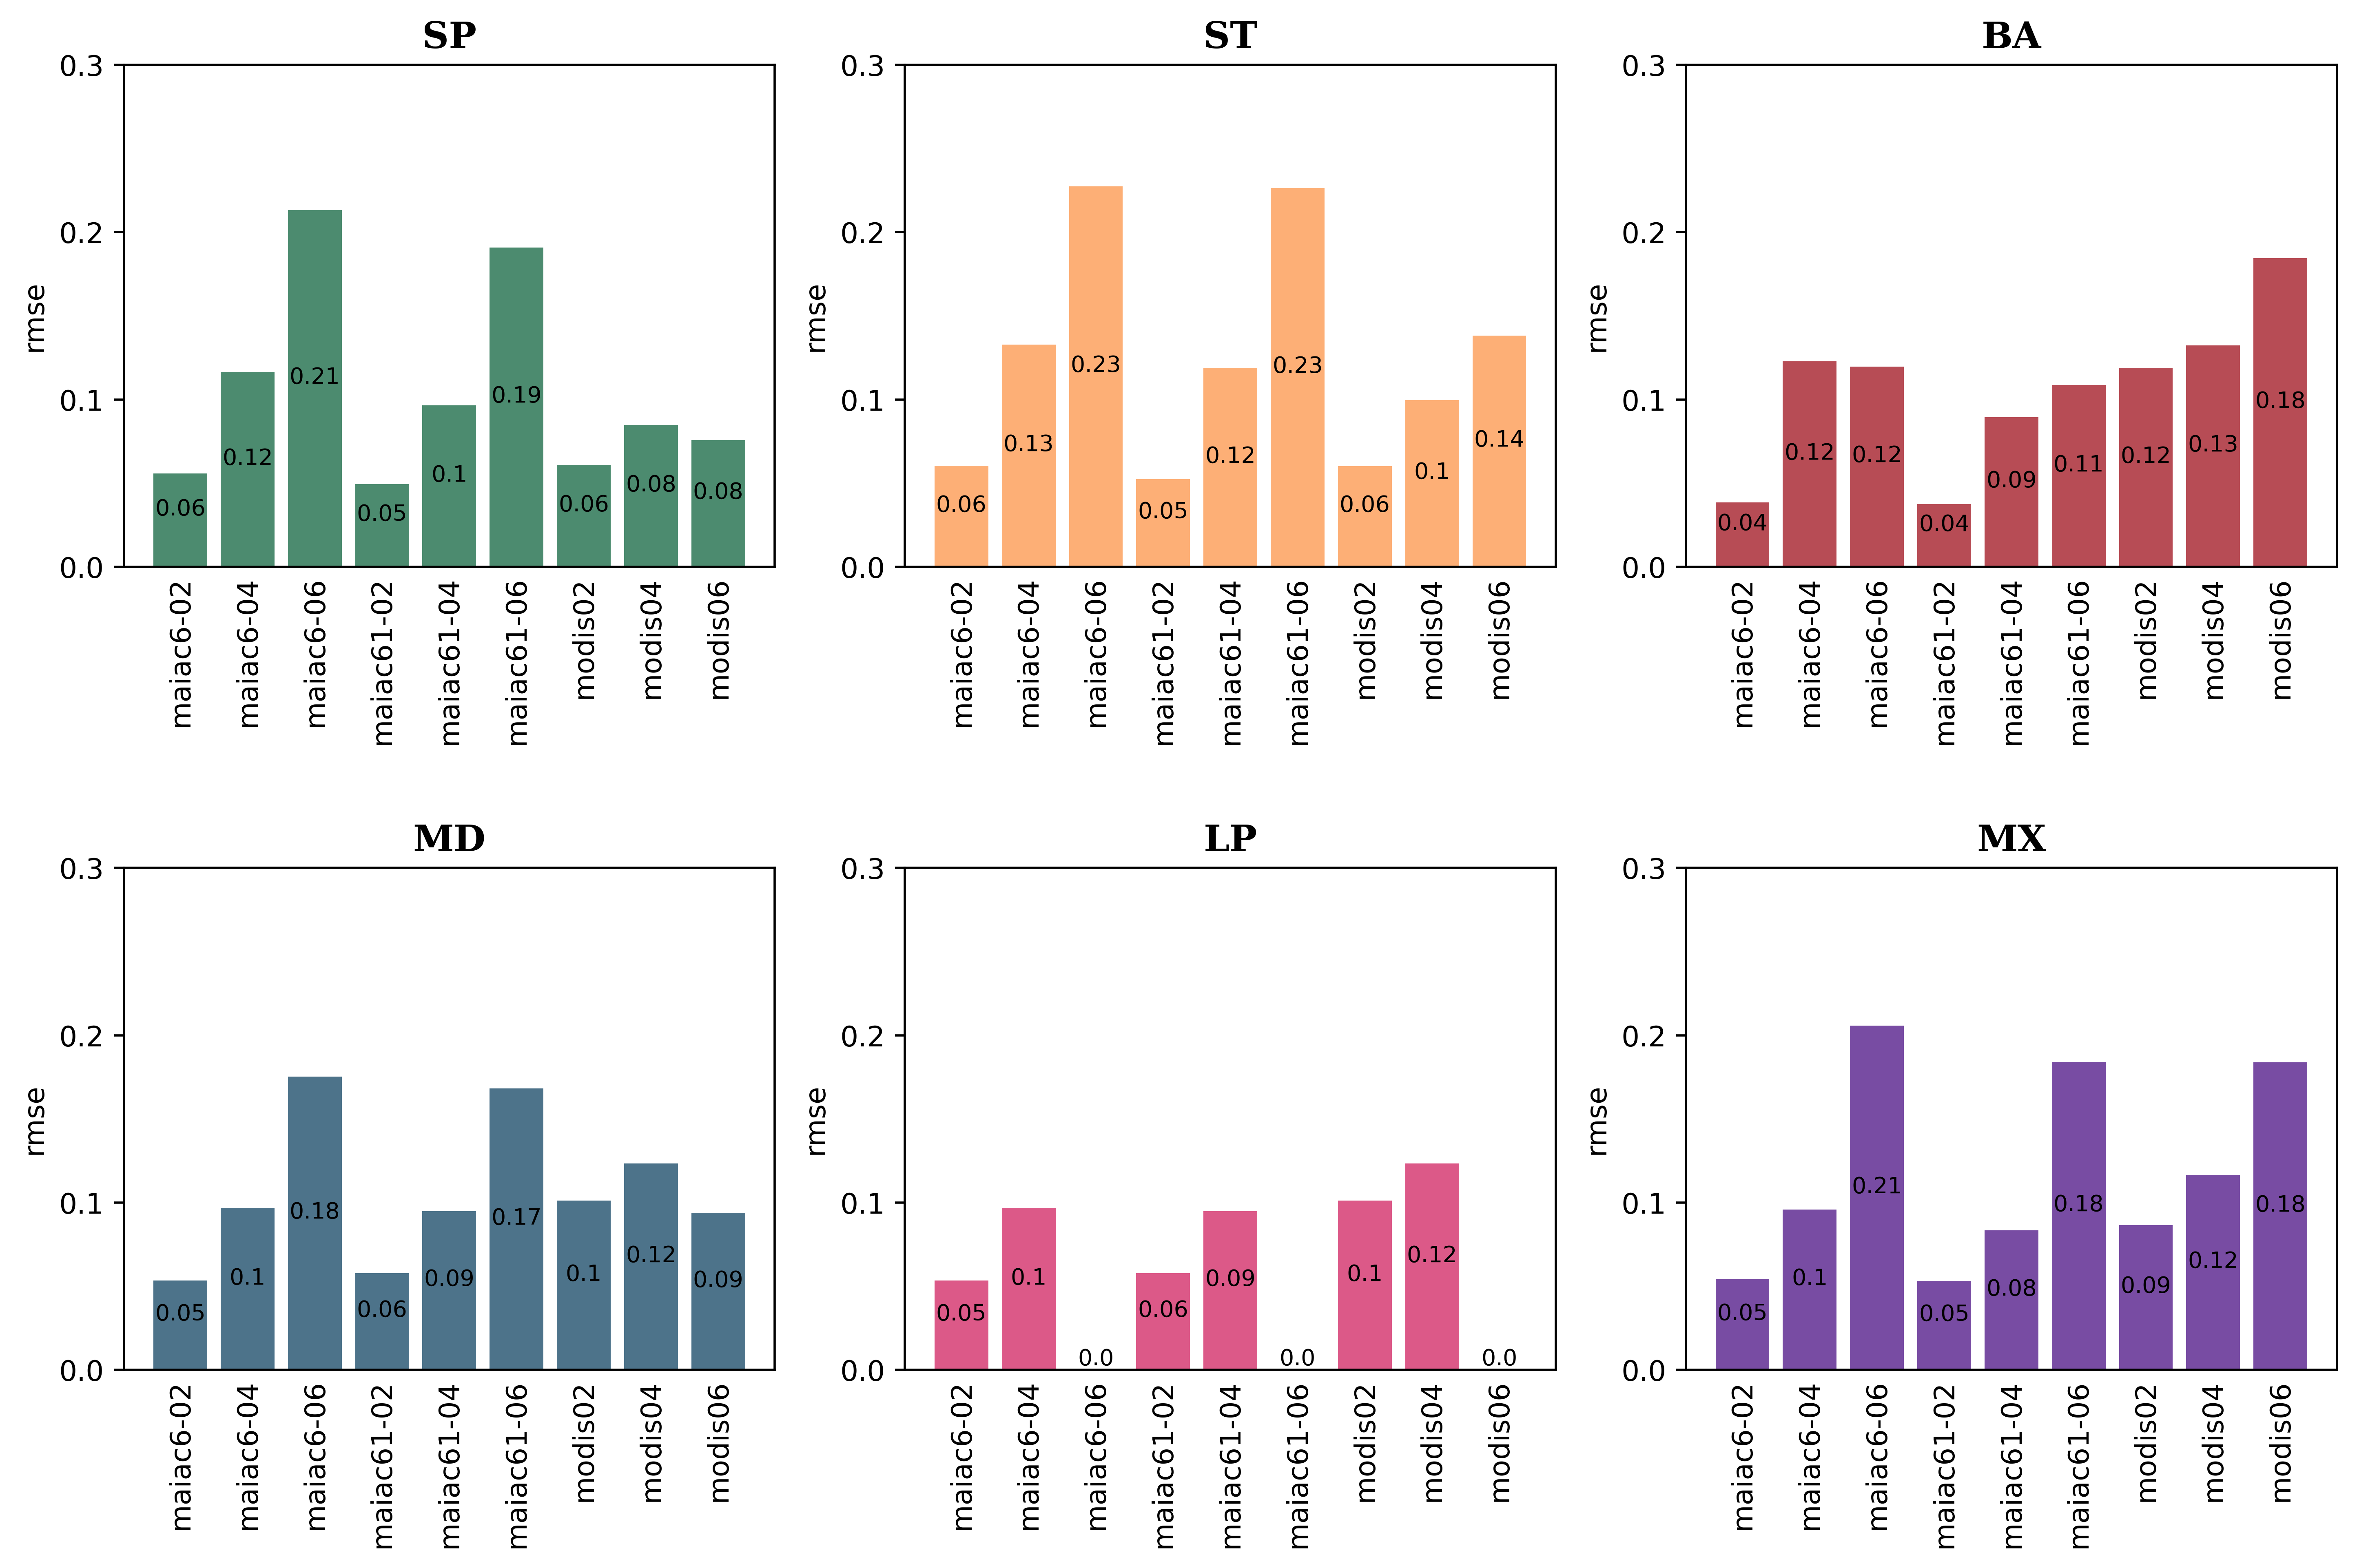

In [10]:
# RMSE
bar_plot (metrica = "rmse",path="D:/Josefina/paper_git/paper_maiac/plot/estadisticas/ciudades/",nrows=2,ncols=3,color_modis = color_modis,color_maiac =color_maiac ,plot='LALAL')


0
1
2
3
4
5


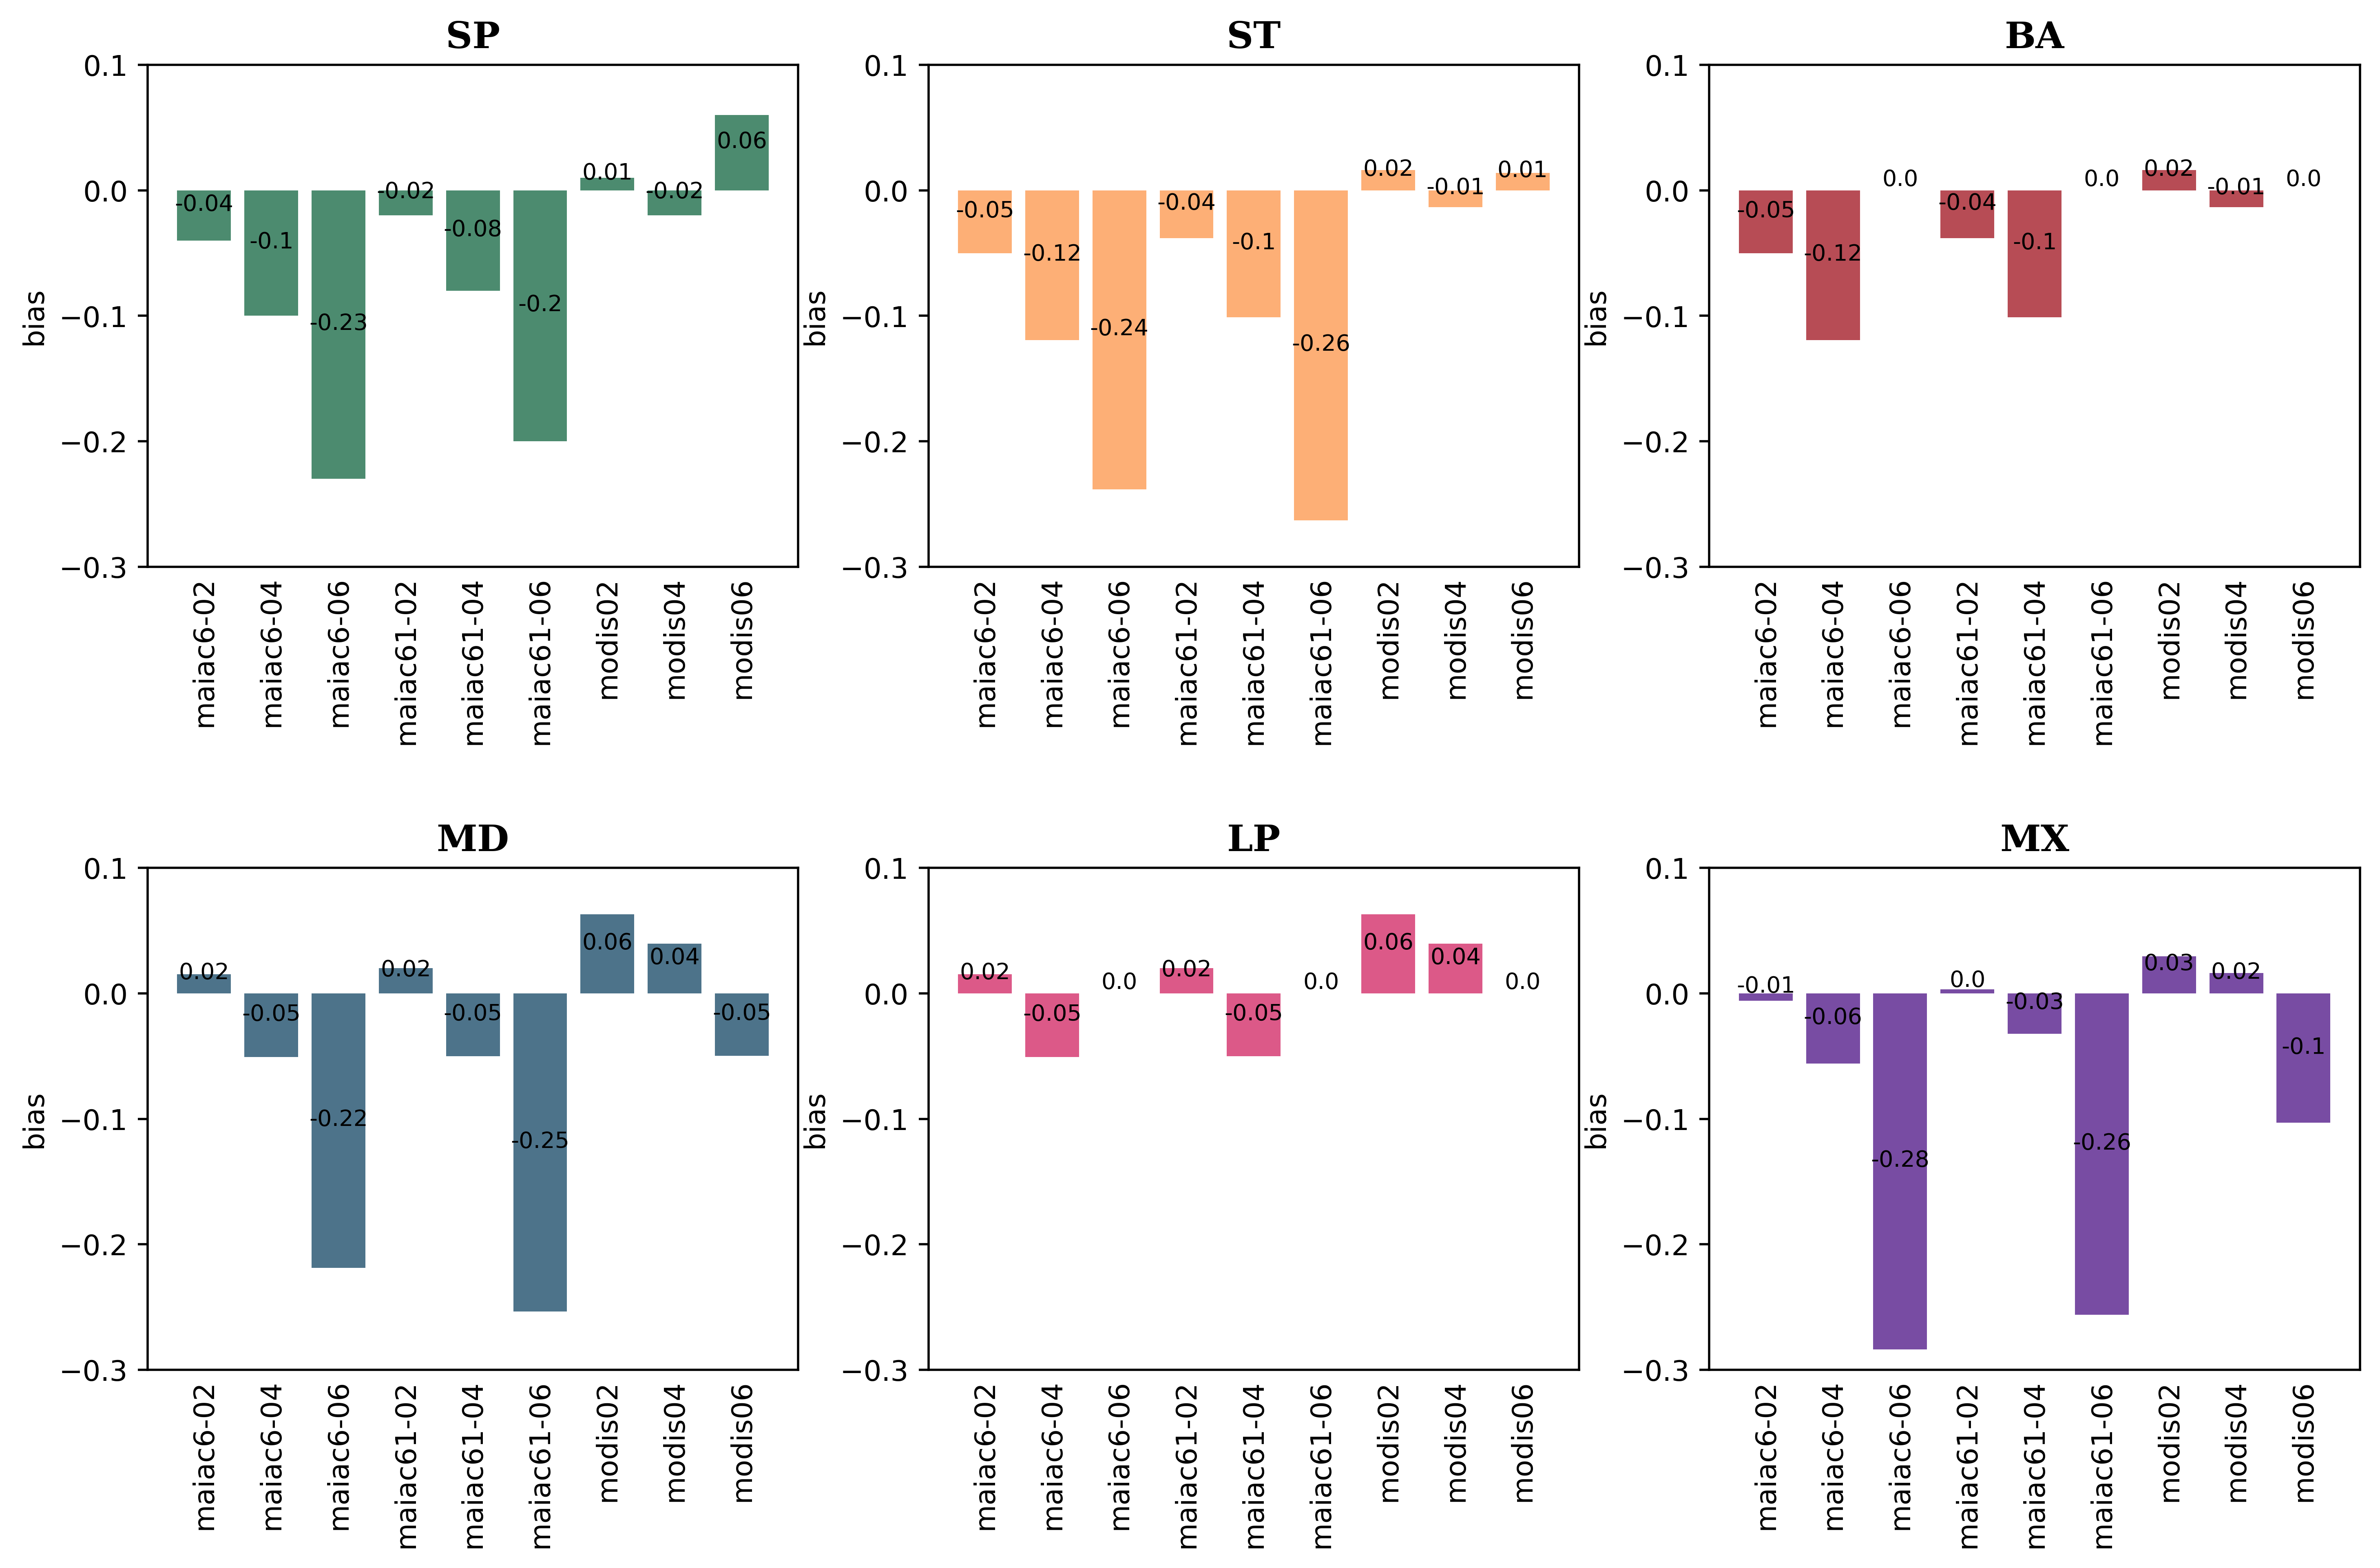

In [178]:
bar_plot (metrica = "bias",path="D:/Josefina/paper_git/paper_maiac/plot/estadisticas/ciudades/",nrows=2,ncols=3,color_modis = color_modis,color_maiac =color_maiac ,plot='LALAL')


0
1
2
3
4
5


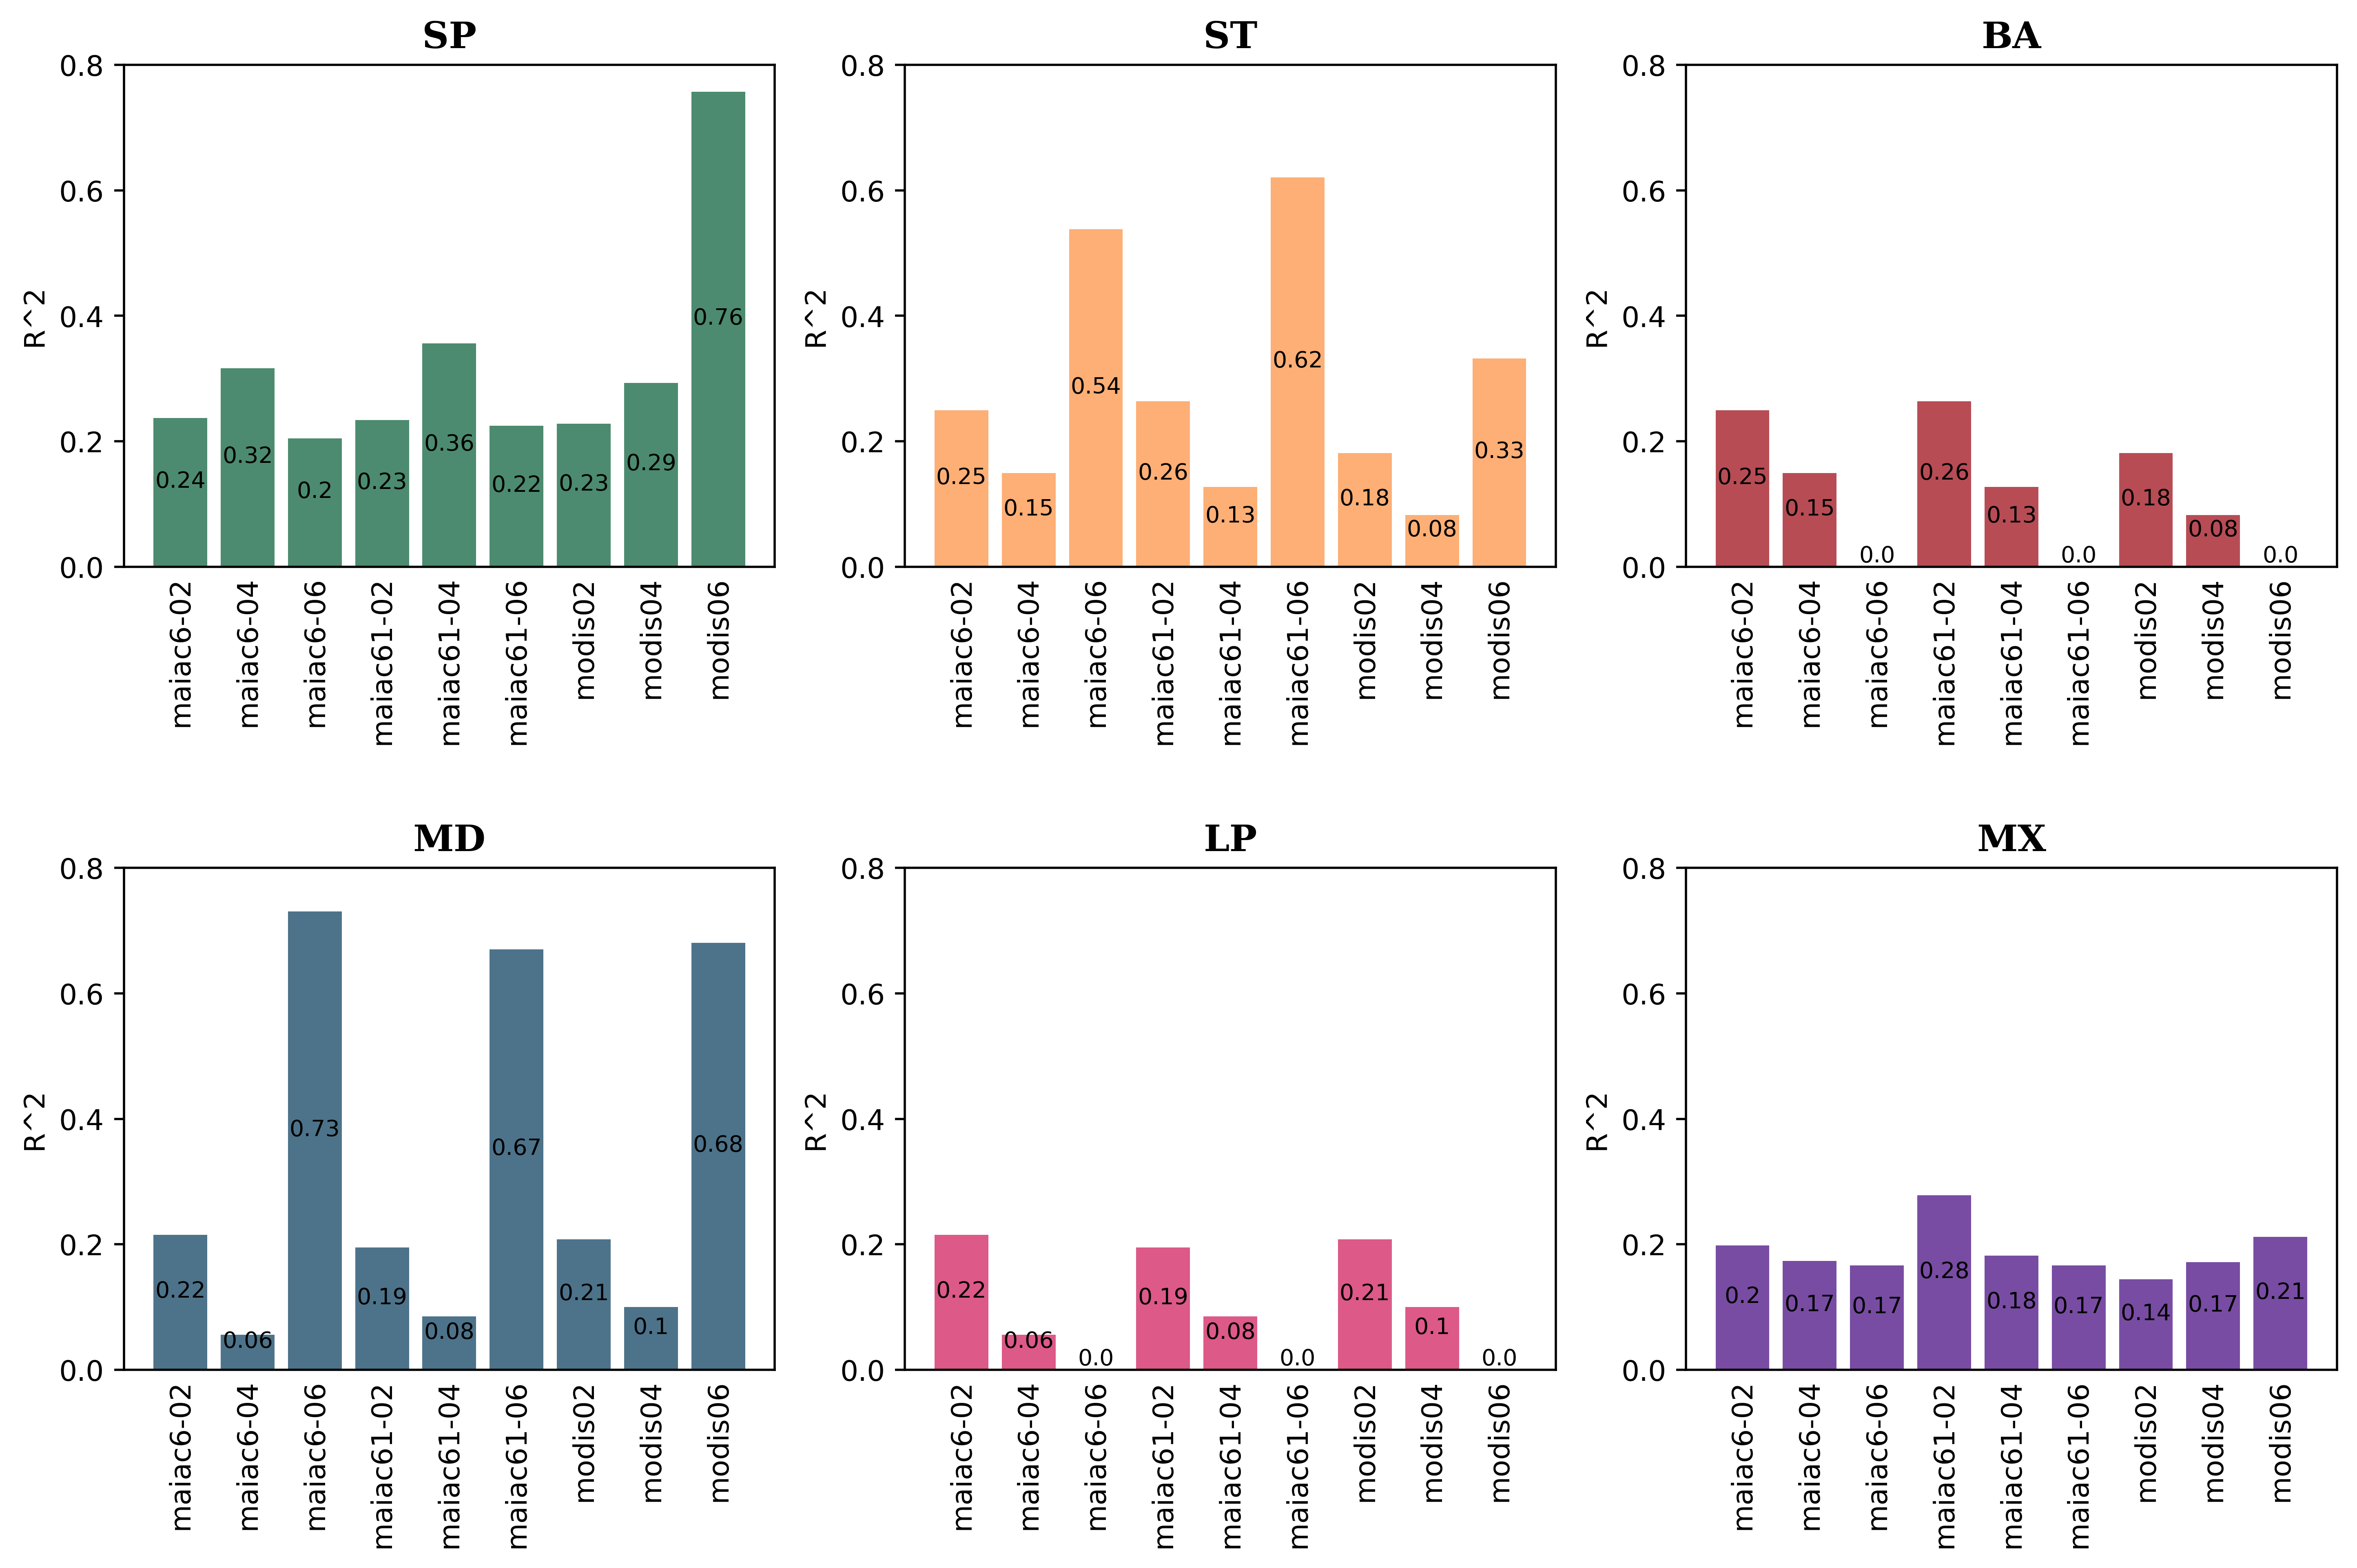

In [183]:

bar_plot (metrica = "R.2.aj",path="D:/Josefina/paper_git/paper_maiac/plot/estadisticas/ciudades/",nrows=2,ncols=3,color_modis = color_modis,color_maiac =color_maiac ,plot='LALAL')


In [5]:

color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"] # CHILE "#fd8d3c"
bar_plot (metrica = "len.mod",path="D:/Josefina/paper_git/paper_maiac/plot/estadisticas/ciudades/",nrows=2,ncols=3,color_modis = color_modis,color_maiac =color_maiac ,plot='LALAL')


0
1
2
3
4
5


ValueError: Image size of 5778x2076405 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 7000x4000 with 6 Axes>